In [10]:
import requests
import pandas as pd
import plotly.express as px

In [28]:
from datetime import datetime
from datetime import timedelta
UTC_today = datetime.utcnow().strftime('%Y-%m-%d')
Forecastend = (datetime.utcnow() + timedelta(days=7)).strftime('%Y-%m-%d')


latitude = '-37.825'
longitude = '144.9816'

start_date = UTC_today
end_date = Forecastend

# API endpoint and parameters for ECMWF and GFS
ecmwf_ml_url = f'https://api.open-meteo.com/v1/ecmwf?latitude={latitude}&longitude={longitude}&hourly=temperature_2m&model=ecmwf_aifs025'
ecmwf_url = f'https://api.open-meteo.com/v1/ecmwf?latitude={latitude}&longitude={longitude}&hourly=temperature_2m&model=ecmwf_ifs025'

# Retrieve ECMWF temperatures
response_ecmwf = requests.get(ecmwf_ml_url)
if response_ecmwf.status_code == 200:
    data_ecmwf_ml = response_ecmwf.json()

    # Extract ECMWF hourly forecasts within the specified date range
    #hourly_forecasts_ecmwf = [forecast for forecast in data_ecmwf['hourly']['temperature_2m_1h'] if start_date <= forecast['time'][:10] <= end_date]
else:
    print("Error retrieving ECMWF AI data from Open Meteo API.")

# Retrieve ECMWF temperatures
response_ecmwf = requests.get(ecmwf_url)
if response_ecmwf.status_code == 200:
    data_ecmwf = response_ecmwf.json()

    # Extract ECMWF hourly forecasts within the specified date range
    #hourly_forecasts_ecmwf = [forecast for forecast in data_ecmwf['hourly']['temperature_2m_1h'] if start_date <= forecast['time'][:10] <= end_date]
else:
    print("Error retrieving ECMWF data from Open Meteo API.")


In [29]:
EC = pd.DataFrame(data_ecmwf['hourly'])
EC.index = pd.to_datetime(EC['time'])
EC = EC.drop('time', axis =1)

EC_ml = pd.DataFrame(data_ecmwf_ml['hourly'])
EC_ml.index = pd.to_datetime(EC_ml['time'])
EC_ml = EC_ml.drop('time', axis =1)

<Axes: xlabel='time'>

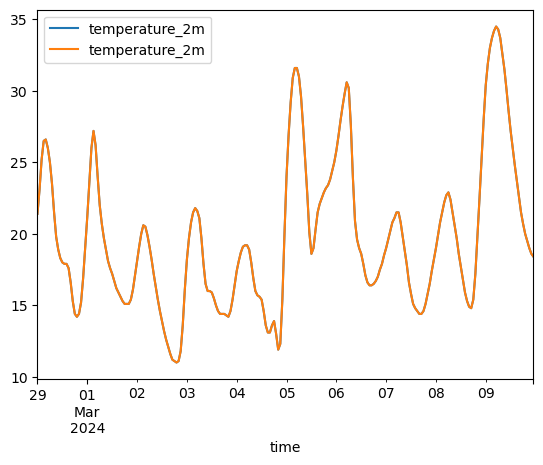

In [30]:
EC.plot(ax = EC_ml.plot())

In [ ]:
https://ensemble-api.open-meteo.com/v1/ensemble?latitude=52.52&longitude=13.41&hourly=temperature_2m,cloud_cover,wind_speed_10m,wind_direction_10m,direct_normal_irradiance&wind_speed_unit=ms&models=ecmwf_ifs025,bom_access_global_ensemble

In [2]:
import requests
import pandas as pd
import plotly.express as px

In [9]:
from datetime import datetime
from datetime import timedelta
UTC_today = datetime.utcnow().strftime('%Y-%m-%d')
Forecastend = (datetime.utcnow() + timedelta(days=7)).strftime('%Y-%m-%d')


latitude = '-37.825'
longitude = '144.9816'

start_date = UTC_today
end_date = Forecastend

# API endpoint and parameters for ECMWF and GFS
ACC_url = f'https://ensemble-api.open-meteo.com/v1/ensemble?latitude={latitude}&longitude={latitude}&hourly=direct_normal_irradiance&wind_speed_unit=ms&models=bom_access_global_ensemble'
ecmwf_url = f'https://ensemble-api.open-meteo.com/v1/ensemble?latitude={latitude}&longitude={latitude}&hourly=direct_normal_irradiance&wind_speed_unit=ms&models=ecmwf_ifs025'

# Retrieve ECMWF temperatures
response_acc = requests.get(ACC_url)
if response_acc.status_code == 200:
    data_acc_ml = response_acc.json()

    # Extract ECMWF hourly forecasts within the specified date range
    #hourly_forecasts_ecmwf = [forecast for forecast in data_ecmwf['hourly']['temperature_2m_1h'] if start_date <= forecast['time'][:10] <= end_date]
else:
    print("Error retrieving ACCESS data from Open Meteo API.")

# Retrieve ECMWF temperatures
response_ecmwf = requests.get(ecmwf_url)
if response_ecmwf.status_code == 200:
    data_ecmwf = response_ecmwf.json()

    # Extract ECMWF hourly forecasts within the specified date range
    #hourly_forecasts_ecmwf = [forecast for forecast in data_ecmwf['hourly']['temperature_2m_1h'] if start_date <= forecast['time'][:10] <= end_date]
else:
    print("Error retrieving ECMWF data from Open Meteo API.")


In [4]:
response_ecmwf

<Response [400]>

In [14]:
EC = pd.DataFrame(data_ecmwf['hourly'])
EC.index = pd.to_datetime(EC['time'])
EC = EC.drop('time', axis =1)


ACG = pd.DataFrame(data_acc_ml['hourly'])
ACG.index = pd.to_datetime(ACG['time'])
ACG = ACG.drop('time', axis =1)

<Axes: xlabel='time'>

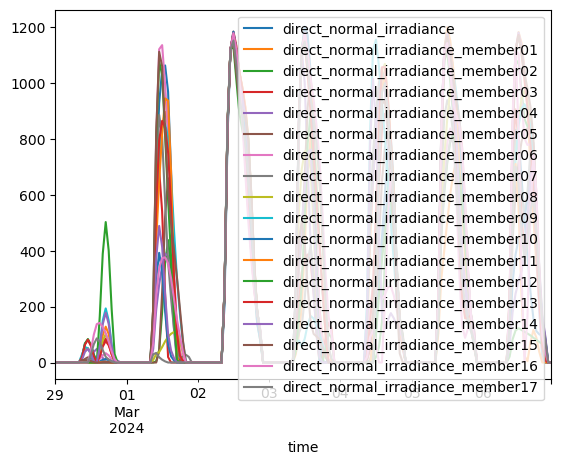

In [16]:
ACG.plot()

In [ ]:
def getPercentiles(mygrp, param):
    """for dataframe, cal percentiles"""

    perList = []
    for n, data in mygrp:
        percentiles = {}

        percentiles['valid_time'] = data.index[0]
        percentiles[param+"_mean"] = data[param].mean()
        percentiles[param+"_max"] = data[param].max()
        percentiles[param+"_min"] = data[param].min()
        percentiles[param+str(90)] = np.percentile(data[param], 90)
        percentiles[param+str(10)] = np.percentile(data[param], 10)
        percentiles[param+str(25)] = np.percentile(data[param], 25)
        percentiles[param+str(75)] = np.percentile(data[param], 75)

        perList.append(pd.DataFrame([percentiles]))

    df = pd.concat(perList)
    df.index = df.valid_time
    return df[['swh_mean', 'swh_max', 'swh_min', 'swh90', 'swh10',
       'swh25', 'swh75']]